In [2]:
!pip install diffusers transformers accelerate safetensors controlnet_aux --quiet

In [3]:
from PIL import Image
image = Image.open("/content/ciudadCyberpunkBase.jpeg").convert("RGB")

In [4]:
from controlnet_aux import CannyDetector

canny = CannyDetector()
condition_canny = canny(image)

/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segmen

In [5]:
from controlnet_aux import MidasDetector

# Carga el detector midas con pesos preentrenados
depth = MidasDetector.from_pretrained("lllyasviel/Annotators")
condition_depth = depth(image)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


dpt_hybrid-midas-501f0c75.pt:   0%|          | 0.00/493M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:138: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


In [6]:
from controlnet_aux import OpenposeDetector

# Carga el detector OpenPose desde weights preentrenados
pose_detector = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
condition_pose = pose_detector(image, hand_and_face=True)


body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

In [7]:
from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline, ControlNetModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Pipeline solo texto
pipe_txt = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
).to(device)

# Pipeline con ControlNet (usa el mismo model de antes o recárgalo)
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
)

pipe_ctrl = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
).to(device)

# Generación solo texto
result_text = pipe_txt(
    prompt="A cyberpunk city skyline at night with a car and person with a arm, with neon colors",
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]
result_text.save("only_text.png")

# Generación condicionada con ControlNet (ejemplo con canny)
from controlnet_aux import CannyDetector
canny = CannyDetector()
condition_canny = canny(image)  # o una imagen base
result_canny = pipe_ctrl(
    prompt="A cyberpunk city skyline at night with a car and person with a arm, with neon colors",
    image=condition_canny,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]
result_canny.save("with_canny.png")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

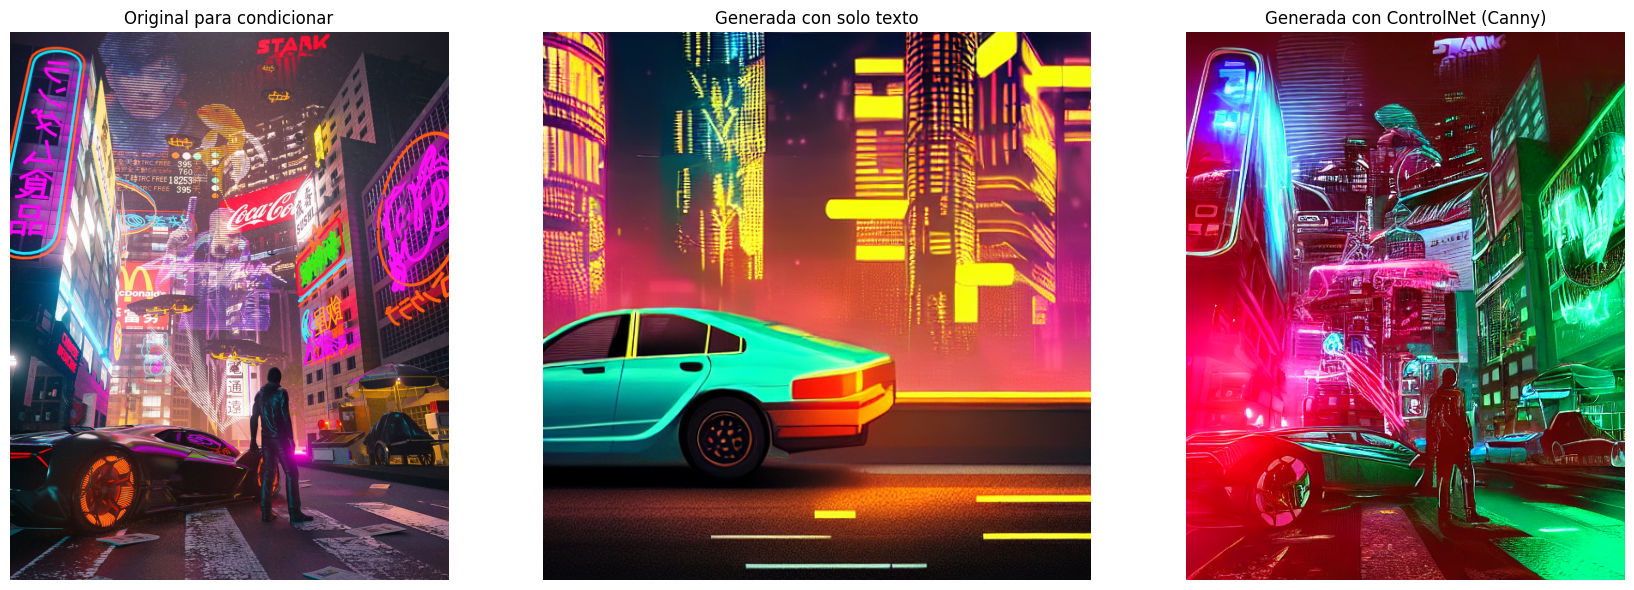

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

# 🖼️ Carga de las imágenes
img_control = Image.open("/content/ciudadCyberpunkBase.jpeg").convert("RGB")
img_text = Image.open("only_text.png")
img_ctrl = Image.open("with_canny.png")

# Configurar figura: 1 fila, 3 columnas
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

# Mostrar la imagen de condición
ax0.imshow(img_control)
ax0.set_title("Original para condicionar")
ax0.axis("off")

# Mostrar imagen generada solo por texto
ax1.imshow(img_text)
ax1.set_title("Generada con solo texto")
ax1.axis("off")

# Mostrar imagen generada con ControlNet (Canny)
ax2.imshow(img_ctrl)
ax2.set_title("Generada con ControlNet (Canny)")
ax2.axis("off")

plt.tight_layout()
plt.show()


In [9]:
from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline, ControlNetModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Pipeline solo texto
pipe_txt = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
).to(device)

# Pipeline con ControlNet (usa el mismo model de antes o recárgalo)
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
)

pipe_ctrl = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16 if device=="cuda" else torch.float32
).to(device)

# Generación solo texto
result_text = pipe_txt(
    prompt="the downtown from cyberpunk city at night with a car and person with a arm, with neon colors and with fish holograms at the center",
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]
result_text.save("only_text2.png")

# Generación condicionada con ControlNet (ejemplo con canny)
from controlnet_aux import CannyDetector
canny = CannyDetector()
condition_canny = canny(image)  # o una imagen base
result_canny = pipe_ctrl(
    prompt="the downtown from cyberpunk city at night with a car and person with a arm, with neon colors and with fish holograms at the center",
    image=condition_canny,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]
result_canny.save("with_canny2.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

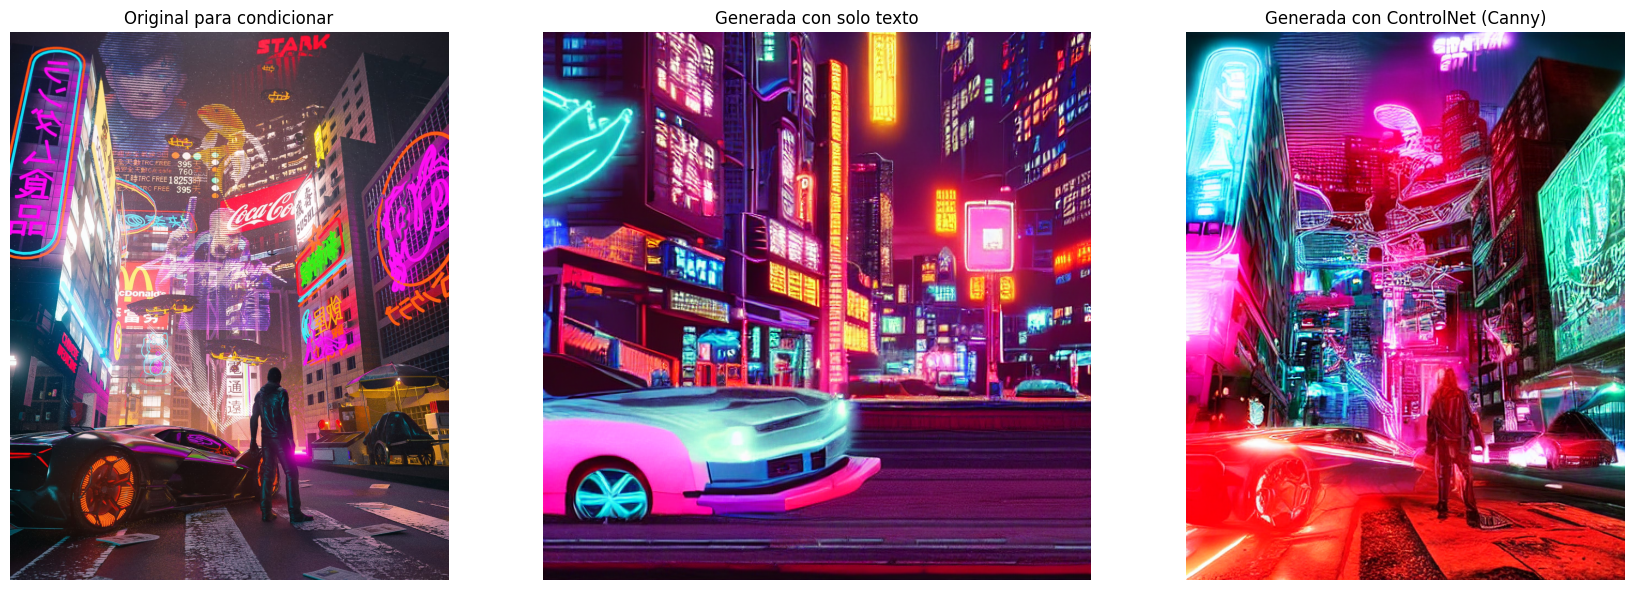

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

# 🖼️ Carga de las imágenes
img_control = Image.open("/content/ciudadCyberpunkBase.jpeg").convert("RGB")
img_text = Image.open("only_text2.png")
img_ctrl = Image.open("with_canny2.png")

# Configurar figura: 1 fila, 3 columnas
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

# Mostrar la imagen de condición
ax0.imshow(img_control)
ax0.set_title("Original para condicionar")
ax0.axis("off")

# Mostrar imagen generada solo por texto
ax1.imshow(img_text)
ax1.set_title("Generada con solo texto")
ax1.axis("off")

# Mostrar imagen generada con ControlNet (Canny)
ax2.imshow(img_ctrl)
ax2.set_title("Generada con ControlNet (Canny)")
ax2.axis("off")

plt.tight_layout()
plt.show()


In [17]:
from controlnet_aux import CannyDetector, MidasDetector, OpenposeDetector

canny = CannyDetector()
depth = MidasDetector.from_pretrained("lllyasviel/Annotators")
pose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

cond_canny = canny(image)
cond_depth = depth(image)
cond_pose = pose(image, hand_and_face=True)

for cond, label in [(cond_canny, "Canny"), (cond_depth, "Depth"), (cond_pose, "Pose")]:
    img = pipe_ctrl(
        prompt="the downtown from cyberpunk city at night with a car and person with a arm, with neon colors and with fish holograms at the center",
        image=cond,
        num_inference_steps=30,
        guidance_scale=7.5
    ).images[0]
    img.save(f"result_{label}.png")


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

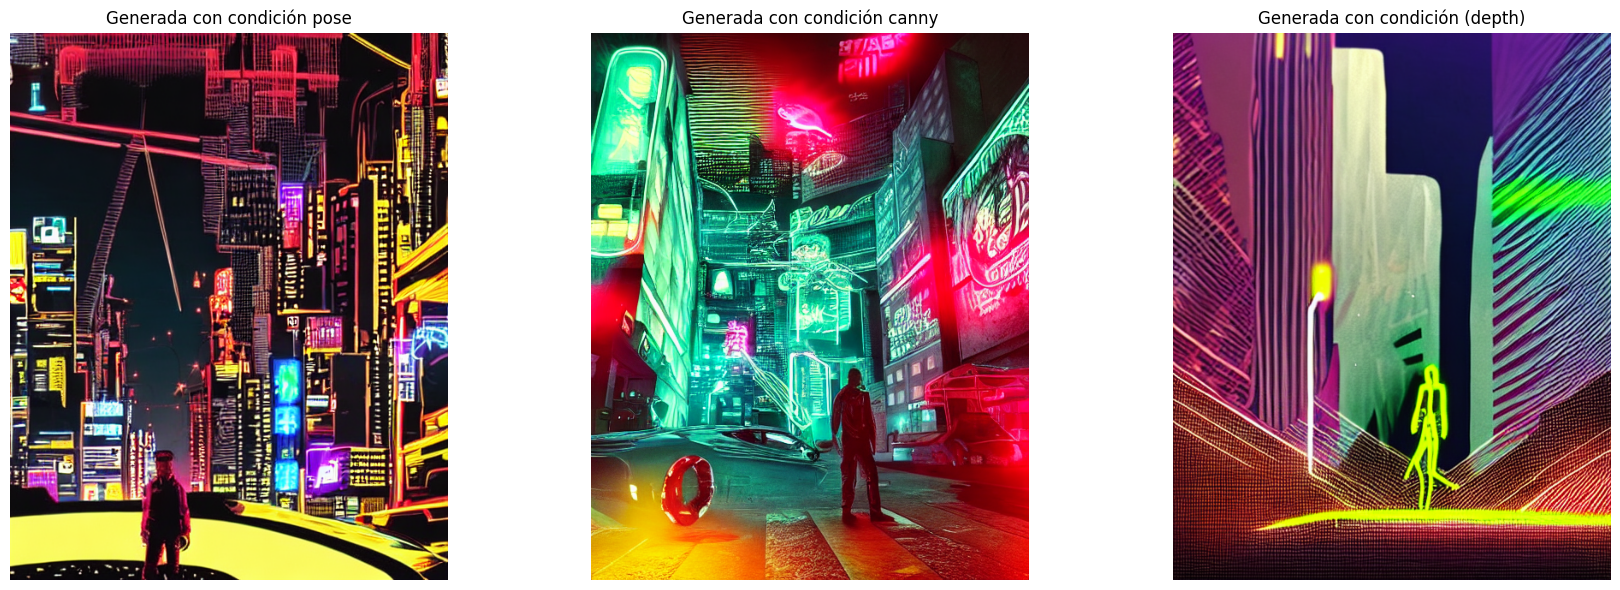

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# 🖼️ Carga de las imágenes
img_control = Image.open("result_Pose.png").convert("RGB")
img_text = Image.open("result_Canny.png")
img_ctrl = Image.open("result_Depth.png")

# Configurar figura: 1 fila, 3 columnas
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

# Mostrar la imagen de condición
ax0.imshow(img_control)
ax0.set_title("Generada con condición pose")
ax0.axis("off")

# Mostrar imagen generada solo por texto
ax1.imshow(img_text)
ax1.set_title("Generada con condición canny")
ax1.axis("off")

# Mostrar imagen generada con ControlNet (Canny)
ax2.imshow(img_ctrl)
ax2.set_title("Generada con condición (depth)")
ax2.axis("off")

plt.tight_layout()
plt.show()
